In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from PIL import Image
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



In [5]:
df=pd.read_csv('E:\\3rd sem proj\\fds ko project\\archive\\training_images\\training_images_digit.csv')

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0


In [8]:
#shuffling the data
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [10]:
X=df.drop('label',axis=1)
y=df['label']

In [11]:
pc=PCA(n_components=250)
pc.fit(X)
X_pc=pc.transform(X)

In [ ]:
#making a dict for numbers and labels:
digit_dict={
    '0':'०',
    '१': '1',
    '२': '2',
    '३': '3',
    '४': '4',
    '५': '5',
    '६': '6',
    '७': '7',
    '८': '8',
    '९': '9'
}

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_pc,y,test_size=0.2,random_state=42)

In [14]:
lr=LogisticRegression(multi_class='multinomial',max_iter=1000)
lr.fit(X_train,y_train)


e:\conda\condaex\envs\classifier\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [16]:
y_pred=lr.predict(X_test)

In [19]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.947
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       391
           1       0.98      0.99      0.98       403
           2       0.87      0.89      0.88       389
           3       0.90      0.86      0.88       401
           4       0.95      0.95      0.95       389
           5       0.95      0.96      0.95       426
           6       0.93      0.92      0.93       398
           7       0.95      0.96      0.96       402
           8       0.98      0.98      0.98       398
           9       0.97      0.98      0.97       403

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



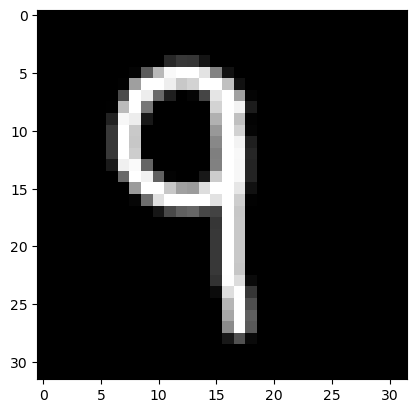

In [27]:
image=Image.open('E:\\3rd sem proj\\fds ko project\\archive\\testing_sample_images\ek.png')
image=image.convert('L')
image=image.resize((32,32))
plt.imshow(image,cmap='gray')
plt.show()

In [28]:
image=np.array(image)/255

In [29]:
image=image.flatten()
pca_image=pc.transform([image])

e:\conda\condaex\envs\classifier\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [30]:
lr.predict(pca_image)

array([4])

<Axes: >

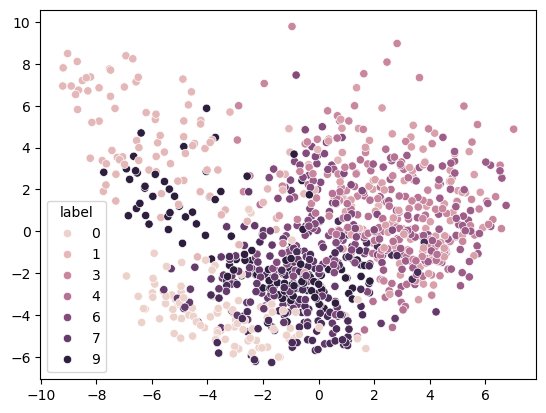

In [40]:
sns.scatterplot(x=X_pc[:1000,0],y=X_pc[:1000,1],hue=y[:1000])